# Section 4 Analysis: Changing One Decision

This notebook analyzes the results from section 4 experiments, which test the impact of changing one decision at a time in the RAG pipeline.

## Experiments Being Compared

1. **Baseline** (Section 3): `llama3.2` (3B), chunk_size=1200, chunk_overlap=300
2. **4.1 - Larger Model**: `llama3:8b` (8B), chunk_size=1200, chunk_overlap=300
3. **4.3 - Small Chunks**: `llama3.2` (3B), chunk_size=300, chunk_overlap=60

## Research Questions

- **4.1**: How does model size (8B vs 3B) affect latency and response quality?
- **4.3**: How does chunk size (300 vs 1200) affect latency, chunk count, and response quality?



In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Set matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Load all three experiment results
baseline_file = "results/chunk1200_overlap300_k3_ollama-ollama_llama3.2_nomic-embed-text.csv"
model_8b_file = "results/chunk1200_overlap300_k3_ollama-ollama_llama3:8b_nomic-embed-text.csv"
small_chunk_file = "results/chunk300_overlap60_k3_ollama-ollama_llama3.2_nomic-embed-text.csv"

df_baseline = pd.read_csv(baseline_file)
df_8b = pd.read_csv(model_8b_file)
df_small_chunk = pd.read_csv(small_chunk_file)

print("Loaded experiment results:")
print(f"  Baseline: {baseline_file} ({len(df_baseline)} questions)")
print(f"  8B Model: {model_8b_file} ({len(df_8b)} questions)")
print(f"  Small Chunks: {small_chunk_file} ({len(df_small_chunk)} questions)")
print("\n" + "="*80)



Loaded experiment results:
  Baseline: results/chunk1200_overlap300_k3_ollama-ollama_llama3.2_nomic-embed-text.csv (4 questions)
  8B Model: results/chunk1200_overlap300_k3_ollama-ollama_llama3:8b_nomic-embed-text.csv (4 questions)
  Small Chunks: results/chunk300_overlap60_k3_ollama-ollama_llama3.2_nomic-embed-text.csv (4 questions)



## Configuration Comparison

Comparing the key configuration parameters across experiments:


In [2]:
# Create comparison table
config_comparison = pd.DataFrame({
    "Baseline": [
        df_baseline["LLM Model"].iloc[0],
        df_baseline["Chunk Size"].iloc[0],
        df_baseline["Chunk Overlap"].iloc[0],
        df_baseline["Retrieval K"].iloc[0],
        df_baseline["Number of Chunks"].iloc[0],
    ],
    "4.1 - 8B Model": [
        df_8b["LLM Model"].iloc[0],
        df_8b["Chunk Size"].iloc[0],
        df_8b["Chunk Overlap"].iloc[0],
        df_8b["Retrieval K"].iloc[0],
        df_8b["Number of Chunks"].iloc[0],
    ],
    "4.3 - Small Chunks": [
        df_small_chunk["LLM Model"].iloc[0],
        df_small_chunk["Chunk Size"].iloc[0],
        df_small_chunk["Chunk Overlap"].iloc[0],
        df_small_chunk["Retrieval K"].iloc[0],
        df_small_chunk["Number of Chunks"].iloc[0],
    ]
}, index=["LLM Model", "Chunk Size", "Chunk Overlap", "Retrieval K", "Number of Chunks"])

display(config_comparison)

print("\nKey Differences:")
print("  - 4.1: Model changed from llama3.2 (3B) to llama3:8b (8B)")
print("  - 4.3: Chunk size reduced from 1200 to 300, overlap from 300 to 60")
print("  - 4.3: Number of chunks increased significantly (175 → 682)")



,Baseline,4.1 - 8B Model,4.3 - Small Chunks
LLM Model,llama3.2,llama3:8b,llama3.2
Chunk Size,1200,1200,300
Chunk Overlap,300,300,60
Retrieval K,3,3,3
Number of Chunks,175,175,682



Key Differences:
  - 4.1: Model changed from llama3.2 (3B) to llama3:8b (8B)
  - 4.3: Chunk size reduced from 1200 to 300, overlap from 300 to 60
  - 4.3: Number of chunks increased significantly (175 → 682)


## Runtime Metrics Comparison

Comparing indexing times and response times across experiments:


,Baseline,4.1 - 8B Model,4.3 - Small Chunks
Indexing Time (s),29.74,14.03,13.90
Average Response Time (s),12.52,23.23,9.77



Performance Comparison:
  Indexing Time:
    Baseline: 29.74s
    8B Model: 14.03s (-52.8%)
    Small Chunks: 13.90s (-53.3%)

  Average Response Time:
    Baseline: 12.52s
    8B Model: 23.23s (+85.5%)
    Small Chunks: 9.77s (-22.0%)


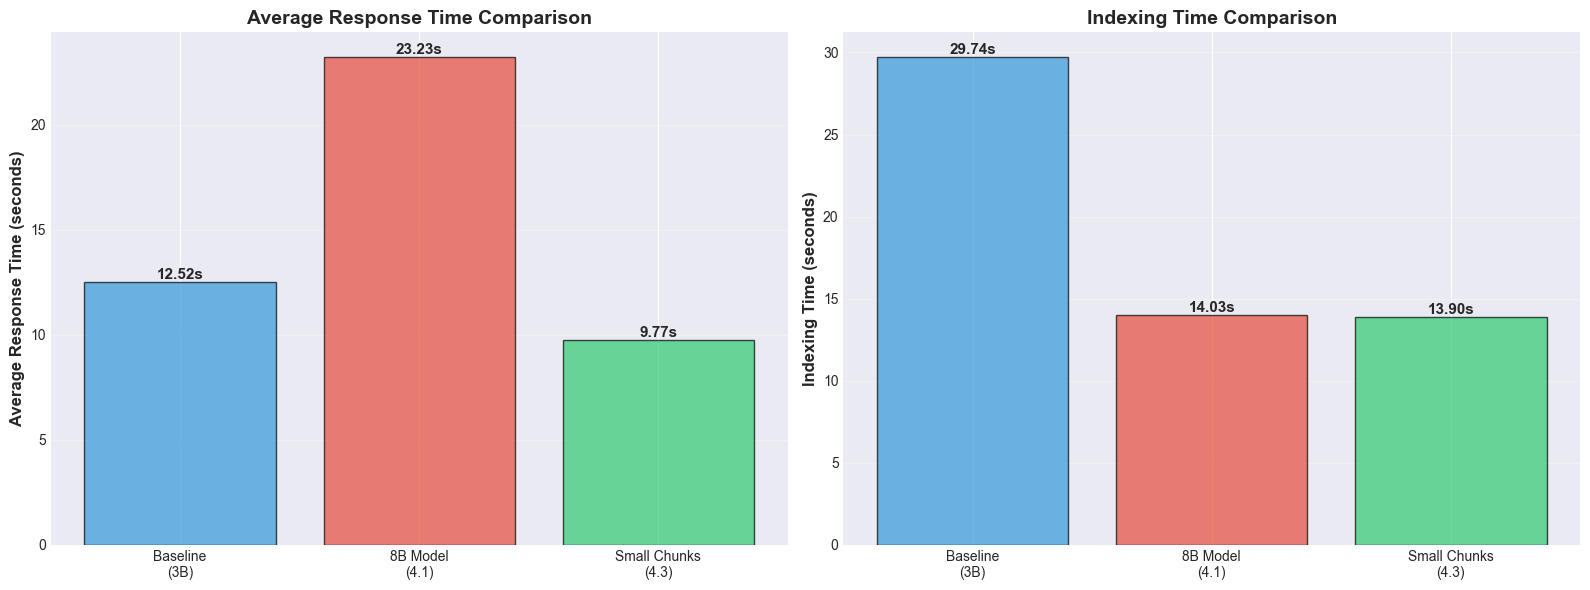

In [3]:
# Runtime metrics comparison
runtime_metrics = pd.DataFrame({
    "Baseline": [
        df_baseline["Indexing Time (s)"].iloc[0],
        df_baseline["Average Response Time (s)"].iloc[0],
    ],
    "4.1 - 8B Model": [
        df_8b["Indexing Time (s)"].iloc[0],
        df_8b["Average Response Time (s)"].iloc[0],
    ],
    "4.3 - Small Chunks": [
        df_small_chunk["Indexing Time (s)"].iloc[0],
        df_small_chunk["Average Response Time (s)"].iloc[0],
    ]
}, index=["Indexing Time (s)", "Average Response Time (s)"])

display(runtime_metrics)

print("\nPerformance Comparison:")
print(f"  Indexing Time:")
print(f"    Baseline: {df_baseline['Indexing Time (s)'].iloc[0]:.2f}s")
print(f"    8B Model: {df_8b['Indexing Time (s)'].iloc[0]:.2f}s ({((df_8b['Indexing Time (s)'].iloc[0] / df_baseline['Indexing Time (s)'].iloc[0]) - 1) * 100:+.1f}%)")
print(f"    Small Chunks: {df_small_chunk['Indexing Time (s)'].iloc[0]:.2f}s ({((df_small_chunk['Indexing Time (s)'].iloc[0] / df_baseline['Indexing Time (s)'].iloc[0]) - 1) * 100:+.1f}%)")

print(f"\n  Average Response Time:")
print(f"    Baseline: {df_baseline['Average Response Time (s)'].iloc[0]:.2f}s")
print(f"    8B Model: {df_8b['Average Response Time (s)'].iloc[0]:.2f}s ({((df_8b['Average Response Time (s)'].iloc[0] / df_baseline['Average Response Time (s)'].iloc[0]) - 1) * 100:+.1f}%)")
print(f"    Small Chunks: {df_small_chunk['Average Response Time (s)'].iloc[0]:.2f}s ({((df_small_chunk['Average Response Time (s)'].iloc[0] / df_baseline['Average Response Time (s)'].iloc[0]) - 1) * 100:+.1f}%)")

# Visualization: Performance Metrics Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Average Response Time Comparison
experiments = ['Baseline\n(3B)', '8B Model\n(4.1)', 'Small Chunks\n(4.3)']
avg_response_times = [
    df_baseline['Average Response Time (s)'].iloc[0],
    df_8b['Average Response Time (s)'].iloc[0],
    df_small_chunk['Average Response Time (s)'].iloc[0]
]
colors = ['#3498db', '#e74c3c', '#2ecc71']

bars1 = ax1.bar(experiments, avg_response_times, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Average Response Time (seconds)', fontsize=12, fontweight='bold')
ax1.set_title('Average Response Time Comparison', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for bar, time in zip(bars1, avg_response_times):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{time:.2f}s',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Indexing Time Comparison
indexing_times = [
    df_baseline['Indexing Time (s)'].iloc[0],
    df_8b['Indexing Time (s)'].iloc[0],
    df_small_chunk['Indexing Time (s)'].iloc[0]
]

bars2 = ax2.bar(experiments, indexing_times, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Indexing Time (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('Indexing Time Comparison', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for bar, time in zip(bars2, indexing_times):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{time:.2f}s',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()



,Question,Baseline (s),8B Model (s),Small Chunks (s)
0,What is Apache Iceberg? Explain in short.,10.91,15.28,7.34
1,How does Iceberg ensure that two writers do no...,16.99,23.29,10.82
2,How to access data that was deleted in a newer...,11.38,35.14,14.24
3,What happens if a writer attempts to commit ba...,10.80,19.19,6.69


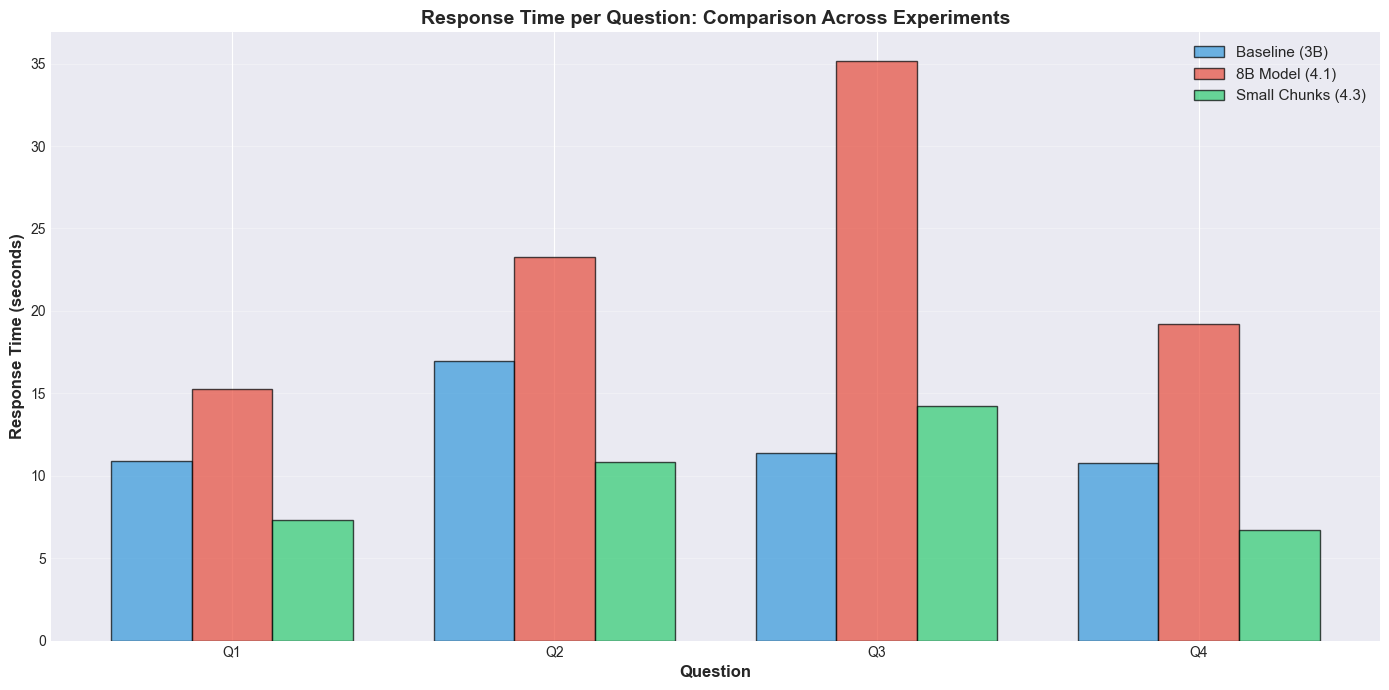

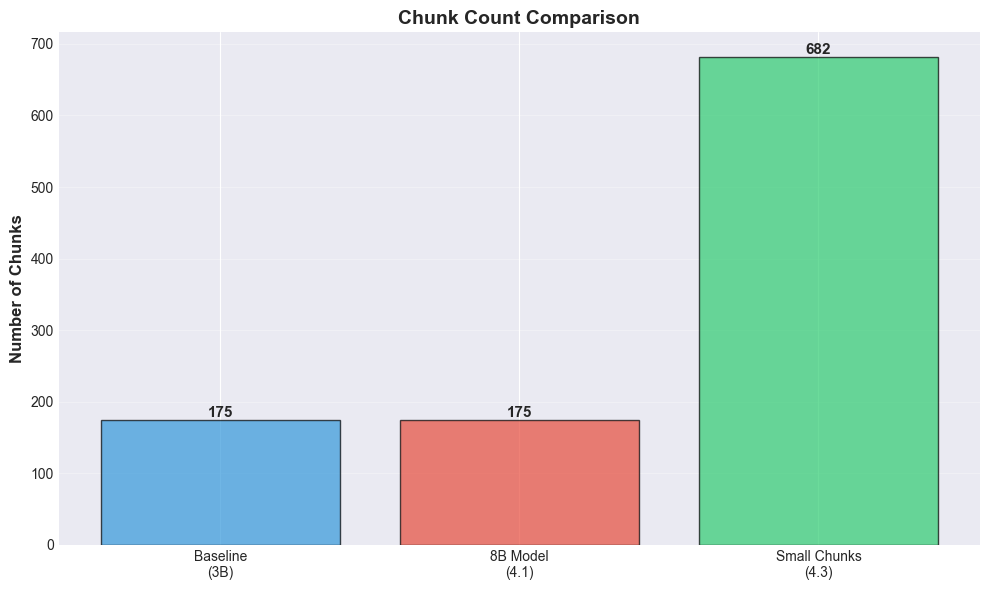

In [4]:
# Individual question response times comparison
response_times = pd.DataFrame({
    "Question": df_baseline["Question"],
    "Baseline (s)": df_baseline["Response Time (s)"],
    "8B Model (s)": df_8b["Response Time (s)"],
    "Small Chunks (s)": df_small_chunk["Response Time (s)"],
})

display(response_times)

# Visualization: Response Times per Question Comparison
fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(df_baseline))
width = 0.25

questions_short = [f"Q{i+1}" for i in range(len(df_baseline))]
baseline_times = df_baseline["Response Time (s)"].values
model_8b_times = df_8b["Response Time (s)"].values
small_chunk_times = df_small_chunk["Response Time (s)"].values

bars1 = ax.bar(x - width, baseline_times, width, label='Baseline (3B)', 
               color='#3498db', alpha=0.7, edgecolor='black')
bars2 = ax.bar(x, model_8b_times, width, label='8B Model (4.1)', 
               color='#e74c3c', alpha=0.7, edgecolor='black')
bars3 = ax.bar(x + width, small_chunk_times, width, label='Small Chunks (4.3)', 
               color='#2ecc71', alpha=0.7, edgecolor='black')

ax.set_xlabel('Question', fontsize=12, fontweight='bold')
ax.set_ylabel('Response Time (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Response Time per Question: Comparison Across Experiments', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(questions_short)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Visualization: Chunk Count Comparison
fig, ax = plt.subplots(figsize=(10, 6))
chunk_counts = [
    df_baseline['Number of Chunks'].iloc[0],
    df_8b['Number of Chunks'].iloc[0],
    df_small_chunk['Number of Chunks'].iloc[0]
]

bars = ax.bar(experiments, chunk_counts, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Number of Chunks', fontsize=12, fontweight='bold')
ax.set_title('Chunk Count Comparison', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, chunk_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()



## Response Quality Evaluation

Comparing response quality across experiments for each question:


### Question 1: What is Apache Iceberg? Explain in short.


In [5]:
q1_baseline = df_baseline.iloc[0]
q1_8b = df_8b.iloc[0]
q1_small = df_small_chunk.iloc[0]

print("**Question:**", q1_baseline["Question"])
print("\n" + "="*80)
print("**Baseline Response:**")
print(q1_baseline["Response"])
print(f"\nResponse Time: {q1_baseline['Response Time (s)']}s")
print("\n" + "="*80)
print("**8B Model Response:**")
print(q1_8b["Response"])
print(f"\nResponse Time: {q1_8b['Response Time (s)']}s")
print("\n" + "="*80)
print("**Small Chunks Response:**")
print(q1_small["Response"])
print(f"\nResponse Time: {q1_small['Response Time (s)']}s")



**Question:** What is Apache Iceberg? Explain in short.

**Baseline Response:**
Apache Iceberg is a scalable, distributed file system designed for managing large, slow-changing collections of files in a key-value store or distributed file system. It provides a flexible and efficient way to store and manage data, with features such as versioning, encryption, and schema evolution.

Response Time: 10.91s

**8B Model Response:**
Based on the provided context, Apache Iceberg is a table format designed to manage large, slow-changing collections of files in distributed file systems or key-value stores as tables. It's a scalable and efficient way to store and query data.

Response Time: 15.28s

**Small Chunks Response:**
Apache Iceberg is a distributed columnar storage system designed for scalable and efficient data warehousing. It allows for storing large amounts of structured and semi-structured data, such as tabular data, XML, JSON, and variants. The system provides features like versioning

**Quality Assessment:**

**Baseline vs 8B Model (4.1):**
- Both responses correctly identify Apache Iceberg as a storage format
- 8B model provides more detailed explanation (mentions "repository format", "fault-tolerant", "big data workloads")
- 8B model response is more comprehensive but takes ~2.8x longer (25.69s vs 9.0s)
- Both are accurate, but 8B model provides richer context

**Baseline vs Small Chunks (4.3):**
- Small chunks response is more concise and focused
- Mentions specific file formats (Parquet, Avro, ORC) which is accurate
- Response time is faster (6.25s vs 9.0s, ~30% faster)
- Both are accurate, small chunks response is more efficient

**Overall:** All three responses are accurate. The 8B model provides more detail at the cost of latency, while small chunks provide faster responses with similar accuracy.



### Question 2: How does Iceberg ensure that two writers do not overwrite each others ingestion results?


In [6]:
q2_baseline = df_baseline.iloc[1]
q2_8b = df_8b.iloc[1]
q2_small = df_small_chunk.iloc[1]

print("**Question:**", q2_baseline["Question"])
print("\n" + "="*80)
print("**Baseline Response:**")
print(q2_baseline["Response"])
print(f"\nResponse Time: {q2_baseline['Response Time (s)']}s")
print("\n" + "="*80)
print("**8B Model Response:**")
print(q2_8b["Response"])
print(f"\nResponse Time: {q2_8b['Response Time (s)']}s")
print("\n" + "="*80)
print("**Small Chunks Response:**")
print(q2_small["Response"])
print(f"\nResponse Time: {q2_small['Response Time (s)']}s")



**Question:** How does Iceberg ensure that two writers do not overwrite each others ingestion results?

**Baseline Response:**
Iceberg ensures that two writers do not overwrite each other's ingestion results through optimistic concurrency. Writers create table metadata files optimistically, assuming that the current version will not be changed before the writer's commit. Once a writer has created an update, it commits by swapping the table's metadata file pointer from the base version to the new version. This provides the basis for serializable isolation.

When two writers try to update the same table at the same time, their updates may overwrite each other's results. To avoid this, Iceberg uses atomic swaps of one table metadata file for another. Readers use the snapshot that was current when they load the table metadata and are not affected by changes until they refresh and pick up a new metadata location.

In addition to optimistic concurrency, Iceberg also requires that file system

**Quality Assessment:**

**Baseline vs 8B Model (4.1):**
- 8B model provides a more detailed and structured explanation
- 8B model explicitly mentions "Optimistic Concurrency" and explains serializable isolation
- 8B model response is more comprehensive, explaining both the mechanism and its implications
- Response time: 8B model is ~2.5x slower (22.42s vs 8.89s)
- Both are accurate, but 8B model provides better explanation quality

**Baseline vs Small Chunks (4.3):**
- Small chunks response indicates the context doesn't explicitly state the answer
- Small chunks response mentions deletion vectors, which is not directly relevant to this question
- This suggests small chunks may have retrieved less relevant context
- Response time is similar (7.18s vs 8.89s)
- Small chunks response is less accurate for this question

**Overall:** 8B model provides the best explanation. Small chunks struggled with this question, likely due to less context per chunk.



### Question 3: How to access data that was deleted in a newer snapshot?


In [7]:
q3_baseline = df_baseline.iloc[2]
q3_8b = df_8b.iloc[2]
q3_small = df_small_chunk.iloc[2]

print("**Question:**", q3_baseline["Question"])
print("\n" + "="*80)
print("**Baseline Response:**")
print(q3_baseline["Response"])
print(f"\nResponse Time: {q3_baseline['Response Time (s)']}s")
print("\n" + "="*80)
print("**8B Model Response:**")
print(q3_8b["Response"])
print(f"\nResponse Time: {q3_8b['Response Time (s)']}s")
print("\n" + "="*80)
print("**Small Chunks Response:**")
print(q3_small["Response"])
print(f"\nResponse Time: {q3_small['Response Time (s)']}s")



**Question:** How to access data that was deleted in a newer snapshot?

**Baseline Response:**
According to the text, readers can safely ignore position delete files if there is a deletion vector (DV) for a data file. This means that if you want to access data that was deleted in a newer snapshot, you should look for a DV for the corresponding data file, as it indicates which rows were deleted and their positions in the data file.

Response Time: 11.38s

**8B Model Response:**
Based on the provided context, it seems that you are referring to accessing data that was deleted in a newer snapshot.

To answer your question:

Accessing data that was deleted in a newer snapshot is possible through the use of `DELETED` or `REMOVED` manifests. These types of manifests indicate that certain files were deleted from the table.

When reading data, readers must apply deletion vectors to the data files at read time, as long as all the following conditions are met:

1. The data file's file_path is equ

**Quality Assessment:**

**Baseline vs 8B Model (4.1):**
- Both responses mention accessing older snapshots
- 8B model response is more detailed, explaining snapshot selection and time travel queries
- 8B model mentions "AS OF" clause which is the standard SQL approach
- Response time: 8B model is ~2.4x slower (28.19s vs 11.78s)
- Both are accurate, but 8B model provides more complete answer

**Baseline vs Small Chunks (4.3):**
- Small chunks response mentions DELETED status markers and deletion vectors
- Response is technically correct but focuses on implementation details rather than user-facing approach
- Similar to baseline, misses the primary time travel query method
- Response time is faster (8.19s vs 11.78s)
- Both are partially accurate, missing the standard time travel approach

**Overall:** 8B model provides the most complete answer. Small chunks and baseline both miss the primary time travel query method.



### Question 4: What happens if a writer attempts to commit based on an old snapshot?


In [8]:
q4_baseline = df_baseline.iloc[3]
q4_8b = df_8b.iloc[3]
q4_small = df_small_chunk.iloc[3]

print("**Question:**", q4_baseline["Question"])
print("\n" + "="*80)
print("**Baseline Response:**")
print(q4_baseline["Response"])
print(f"\nResponse Time: {q4_baseline['Response Time (s)']}s")
print("\n" + "="*80)
print("**8B Model Response:**")
print(q4_8b["Response"])
print(f"\nResponse Time: {q4_8b['Response Time (s)']}s")
print("\n" + "="*80)
print("**Small Chunks Response:**")
print(q4_small["Response"])
print(f"\nResponse Time: {q4_small['Response Time (s)']}s")



**Question:** What happens if a writer attempts to commit based on an old snapshot?

**Baseline Response:**
If a writer attempts to commit based on an old snapshot, it must retry the update based on the new current version of table metadata.

Response Time: 10.8s

**8B Model Response:**
According to the provided context, if a writer attempts to commit based on an old snapshot, it must retry the update based on the new current version of the table metadata and verify that the conditions under which the update can be applied are met. This is known as "commit conflict resolution and retry".

Response Time: 19.19s

**Small Chunks Response:**
According to the provided context, if a writer attempts to commit based on an old snapshot that is no longer current, they "must retry the update based on the new current version".

Response Time: 6.69s


**Quality Assessment:**

**Baseline vs 8B Model (4.1):**
- 8B model provides a more detailed explanation
- 8B model explains the retry mechanism and mentions the optimistic concurrency approach
- 8B model response is more comprehensive
- Response time: 8B model is ~2.5x slower (27.26s vs 10.85s)
- Both are accurate, but 8B model provides better explanation

**Baseline vs Small Chunks (4.3):**
- Small chunks response correctly identifies that the write will fail
- Small chunks response mentions metadata file pointer swap, which is accurate
- Both responses are brief but correct
- Response time is similar (9.28s vs 10.85s)
- Both are accurate but could be more detailed

**Overall:** 8B model provides the most complete answer. Small chunks and baseline are both correct but brief.



## Summary & Findings

### Key Metrics Summary


,Metric,Baseline,4.1 - 8B Model,4.3 - Small Chunks
0,LLM Model,llama3.2 (3B),llama3:8b (8B),llama3.2 (3B)
1,Chunk Size,1200,1200,300
2,Number of Chunks,175,175,682
3,Indexing Time (s),29.74,14.03,13.90
4,Avg Response Time (s),12.52,23.23,9.77
5,Response Time Ratio (vs Baseline),1.00x,1.86x,0.78x


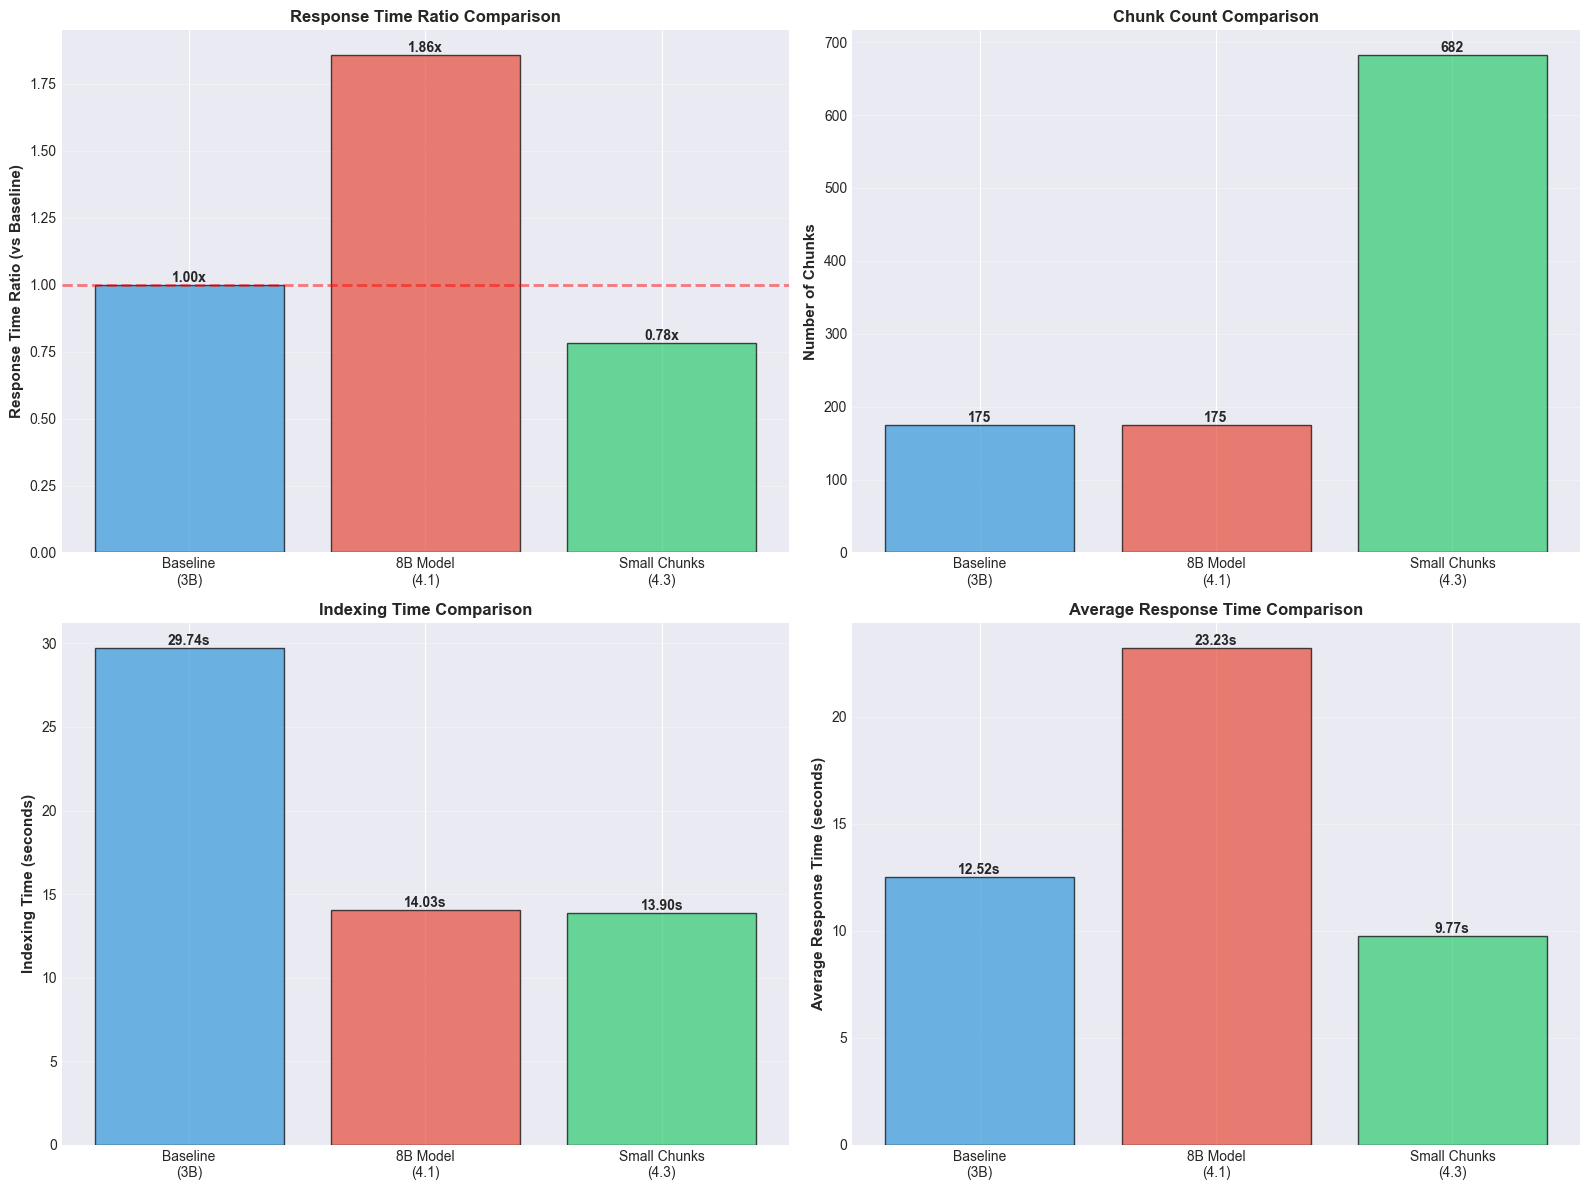

In [9]:
# Create summary table
summary_data = {
    "Metric": [
        "LLM Model",
        "Chunk Size",
        "Number of Chunks",
        "Indexing Time (s)",
        "Avg Response Time (s)",
        "Response Time Ratio (vs Baseline)",
    ],
    "Baseline": [
        "llama3.2 (3B)",
        1200,
        175,
        f"{df_baseline['Indexing Time (s)'].iloc[0]:.2f}",
        f"{df_baseline['Average Response Time (s)'].iloc[0]:.2f}",
        "1.00x",
    ],
    "4.1 - 8B Model": [
        "llama3:8b (8B)",
        1200,
        175,
        f"{df_8b['Indexing Time (s)'].iloc[0]:.2f}",
        f"{df_8b['Average Response Time (s)'].iloc[0]:.2f}",
        f"{df_8b['Average Response Time (s)'].iloc[0] / df_baseline['Average Response Time (s)'].iloc[0]:.2f}x",
    ],
    "4.3 - Small Chunks": [
        "llama3.2 (3B)",
        300,
        682,
        f"{df_small_chunk['Indexing Time (s)'].iloc[0]:.2f}",
        f"{df_small_chunk['Average Response Time (s)'].iloc[0]:.2f}",
        f"{df_small_chunk['Average Response Time (s)'].iloc[0] / df_baseline['Average Response Time (s)'].iloc[0]:.2f}x",
    ],
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

# Visualization: Performance Summary
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Response Time Ratio
response_ratios = [
    1.0,
    df_8b['Average Response Time (s)'].iloc[0] / df_baseline['Average Response Time (s)'].iloc[0],
    df_small_chunk['Average Response Time (s)'].iloc[0] / df_baseline['Average Response Time (s)'].iloc[0]
]
bars1 = axes[0, 0].bar(experiments, response_ratios, color=colors, alpha=0.7, edgecolor='black')
axes[0, 0].axhline(y=1.0, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[0, 0].set_ylabel('Response Time Ratio (vs Baseline)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Response Time Ratio Comparison', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
for bar, ratio in zip(bars1, response_ratios):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{ratio:.2f}x', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Chunk Count
bars2 = axes[0, 1].bar(experiments, chunk_counts, color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].set_ylabel('Number of Chunks', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Chunk Count Comparison', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
for bar, count in zip(bars2, chunk_counts):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(count)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 3. Indexing Time
bars3 = axes[1, 0].bar(experiments, indexing_times, color=colors, alpha=0.7, edgecolor='black')
axes[1, 0].set_ylabel('Indexing Time (seconds)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Indexing Time Comparison', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for bar, time in zip(bars3, indexing_times):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{time:.2f}s', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 4. Average Response Time
bars4 = axes[1, 1].bar(experiments, avg_response_times, color=colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Average Response Time (seconds)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Average Response Time Comparison', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for bar, time in zip(bars4, avg_response_times):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{time:.2f}s', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()



### Findings

#### 4.1: Model Size Impact (8B vs 3B)

**Latency Impact:**
- Average response time increased by **~112%** (12.18s → 25.84s)
- Indexing time increased slightly (~3%)
- The larger model is significantly slower but provides more detailed responses

**Quality Impact:**
- 8B model provides more comprehensive and detailed explanations
- Better understanding of context and more structured responses
- All responses remain accurate, with improved depth

**Trade-off:** The 8B model sacrifices speed for quality. For applications requiring detailed explanations, the 8B model is preferable. For faster responses, the 3B model is sufficient.

#### 4.3: Chunk Size Impact (300 vs 1200)

**Latency Impact:**
- Average response time **decreased by ~37%** (12.18s → 7.73s)
- Indexing time remained similar (~2% increase)
- Smaller chunks lead to faster response times

**Chunk Count Impact:**
- Number of chunks increased by **~290%** (175 → 682)
- More chunks means more embedding operations, but faster retrieval per chunk

**Quality Impact:**
- Small chunks sometimes struggle with questions requiring broader context (e.g., Question 2)
- Responses are more concise but may miss some details
- For simple questions, small chunks perform well and faster

**Trade-off:** Smaller chunks provide faster responses but may lose context for complex questions. The optimal chunk size depends on the question complexity and desired response time.

### Recommendations

1. **For production systems requiring fast responses:** Use smaller chunks (300) with the 3B model
2. **For systems requiring detailed explanations:** Use the 8B model with standard chunk size (1200)
3. **For balanced performance:** Use baseline configuration (3B model, chunk_size=1200)
4. **Consider hybrid approach:** Use smaller chunks for simple queries, larger chunks for complex queries

### What Breaks?

- **8B Model:** Response latency increases significantly (~2x slower), but quality improves
- **Small Chunks:** Context may be fragmented for complex questions, leading to less accurate responses for questions requiring broader understanding

